In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg

In [2]:
T1LMatched1045 = Table.read('T1LMatched1045.fits', format = 'ascii' )
T2LMatched1045 = Table.read('T2LMatched1045.fits', format = 'ascii' )

T1LMatchedXRAYi = Table.read('T1LMatchXRAYi.fits', format = 'fits' )
T2LMatchedXRAYi = Table.read('T2LMatchXRAYi.fits', format = 'fits' )

In [3]:
T1LMatched1045.rename_column('col1', 'RA')  
T1LMatched1045.rename_column('col2', 'Dec') 
T1LMatched1045.rename_column('col3', 'Imag') 
T1LMatched1045.rename_column('col4', 'S')  
T1LMatched1045.rename_column('col5', 'zspec') 
T1LMatched1045.rename_column('col6', 'N')  
T1LMatched1045.rename_column('col7', 'zG')  
T1LMatched1045.rename_column('col8', 'chi2G')  
T1LMatched1045.rename_column('col9', 'LEll')  
T1LMatched1045.rename_column('col10', 'LSbc') 
T1LMatched1045.rename_column('col11', 'LIrr')
T1LMatched1045.rename_column('col12', 'zGA') 
T1LMatched1045.rename_column('col13', 'chi2GA') 
T1LMatched1045.rename_column('col14', 'LAGNp') 
T1LMatched1045.rename_column('col15', 'LELLp') 
T1LMatched1045.rename_column('col16', 'LSbcp') 
T1LMatched1045.rename_column('col17', 'LIrrp') 
T1LMatched1045.rename_column('col18', 'F') 
T1LMatched1045.rename_column('col19', 'EBV') 
T1LMatched1045.rename_column('col20', 'Chi2S') 
T1LMatched1045.rename_column('col21', 'SType') 
T1LMatched1045.rename_column('col22', 'LAGNerg') 
T1LMatched1045.rename_column('col23', 'LSbcerg') 
T1LMatched1045.rename_column('col24', 'LEllerg') 
T1LMatched1045.rename_column('col25', 'LIrrerg') 
T1LMatched1045.rename_column('col26', 'AV') 

T2LMatched1045.rename_column('col1', 'RA')  
T2LMatched1045.rename_column('col2', 'Dec') 
T2LMatched1045.rename_column('col3', 'Imag') 
T2LMatched1045.rename_column('col4', 'S')  
T2LMatched1045.rename_column('col5', 'zspec') 
T2LMatched1045.rename_column('col6', 'N')  
T2LMatched1045.rename_column('col7', 'zG')  
T2LMatched1045.rename_column('col8', 'chi2G')  
T2LMatched1045.rename_column('col9', 'LEll')  
T2LMatched1045.rename_column('col10', 'LSbc') 
T2LMatched1045.rename_column('col11', 'LIrr')
T2LMatched1045.rename_column('col12', 'zGA') 
T2LMatched1045.rename_column('col13', 'chi2GA') 
T2LMatched1045.rename_column('col14', 'LAGNp') 
T2LMatched1045.rename_column('col15', 'LELLp') 
T2LMatched1045.rename_column('col16', 'LSbcp') 
T2LMatched1045.rename_column('col17', 'LIrrp') 
T2LMatched1045.rename_column('col18', 'F') 
T2LMatched1045.rename_column('col19', 'EBV') 
T2LMatched1045.rename_column('col20', 'Chi2S') 
T2LMatched1045.rename_column('col21', 'SType')
T2LMatched1045.rename_column('col22', 'LAGNerg') 
T2LMatched1045.rename_column('col23', 'LSbcerg') 
T2LMatched1045.rename_column('col24', 'LEllerg') 
T2LMatched1045.rename_column('col25', 'LIrrerg') 
T2LMatched1045.rename_column('col26', 'AV') 

T1LMatchedXRAYi.rename_column('col1', 'RA1')  
T1LMatchedXRAYi.rename_column('col2', 'Dec1') 
T1LMatchedXRAYi.rename_column('col3', 'Imag') 
T1LMatchedXRAYi.rename_column('col4', 'S')  
T1LMatchedXRAYi.rename_column('col5', 'zspec') 
T1LMatchedXRAYi.rename_column('col6', 'N')  
T1LMatchedXRAYi.rename_column('col7', 'zG')  
T1LMatchedXRAYi.rename_column('col8', 'chi2G')  
T1LMatchedXRAYi.rename_column('col9', 'LEll')  
T1LMatchedXRAYi.rename_column('col10', 'LSbc') 
T1LMatchedXRAYi.rename_column('col11', 'LIrr')
T1LMatchedXRAYi.rename_column('col12', 'zGA') 
T1LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T1LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T1LMatchedXRAYi.rename_column('col15', 'LELLp') 
T1LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T1LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T1LMatchedXRAYi.rename_column('col18', 'F') 
T1LMatchedXRAYi.rename_column('col19', 'EBV') 
T1LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T1LMatchedXRAYi.rename_column('col21', 'SType') 
T1LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T1LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T1LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T1LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T1LMatchedXRAYi.rename_column('col26', 'AV') 

T2LMatchedXRAYi.rename_column('col1', 'RA1')  
T2LMatchedXRAYi.rename_column('col2', 'Dec1') 
T2LMatchedXRAYi.rename_column('col3', 'Imag') 
T2LMatchedXRAYi.rename_column('col4', 'S')  
T2LMatchedXRAYi.rename_column('col5', 'zspec') 
T2LMatchedXRAYi.rename_column('col6', 'N')  
T2LMatchedXRAYi.rename_column('col7', 'zG')  
T2LMatchedXRAYi.rename_column('col8', 'chi2G')  
T2LMatchedXRAYi.rename_column('col9', 'LEll')  
T2LMatchedXRAYi.rename_column('col10', 'LSbc') 
T2LMatchedXRAYi.rename_column('col11', 'LIrr')
T2LMatchedXRAYi.rename_column('col12', 'zGA') 
T2LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T2LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T2LMatchedXRAYi.rename_column('col15', 'LELLp') 
T2LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T2LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T2LMatchedXRAYi.rename_column('col18', 'F') 
T2LMatchedXRAYi.rename_column('col19', 'EBV') 
T2LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T2LMatchedXRAYi.rename_column('col21', 'SType')
T2LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T2LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T2LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T2LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T2LMatchedXRAYi.rename_column('col26', 'AV')

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T1LMatchedXRAYi['zGA']) , dtype=np.float64) 
T1LMatchedXRAYi.add_column(dL)
#T1LMatchedXRAYi.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T1LMatchedXRAYi.add_column(dLcm)
#T1LMatchedXRAYi.replace_column('dLcm',dLcm)

In [5]:
import math
#LX in erg s-1
##QUESTION: 2-2 MEANS THERES NO DEPENDENCY ON REDSHIFT -APART FROM THE DL - therefore i removed this part from the calaculation below
LX = MaskedColumn(name = "LX", data = 4*math.pi*dLcm**2*T1LMatchedXRAYi['FLUX_S'] , dtype=np.float64) 
T1LMatchedXRAYi.add_column(LX)
#T1LMatchedXRAYi.replace_column('LX',LX)


In [6]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T2LMatchedXRAYi['zGA']) , dtype=np.float64) 
T2LMatchedXRAYi.add_column(dL)
#T2LMatchedXRAYi.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T2LMatchedXRAYi.add_column(dLcm)
#T2LMatchedXRAYi.replace_column('dLcm',dLcm)



In [7]:
import math
#LX in erg s-1
##QUESTION: 2-2 MEANS THERES NO DEPENDENCY ON REDSHIFT -APART FROM THE DL - therefore i removed this part from the calaculation below
LX = MaskedColumn(name = "LX", data = 4*math.pi*dLcm**2*T2LMatchedXRAYi['FLUX_S'] , dtype=np.float64) 
T2LMatchedXRAYi.add_column(LX)
#T2LMatchedXRAYi.replace_column('LX',LX)

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
m = np.linspace(45,47, 20)

def func(x, a, b, c):
    return a*x + b*x**2 + c 

#def func(x, a, b):
    #return a*x + b 

ydata = np.log10(T1LMatchedXRAYi['LX'])
xdata = T1LMatchedXRAYi['LAGNerg']


popt1, pcov1 = curve_fit(func, xdata, ydata)
#r = [-0.2220688*i**2 + 5.42502873*i -23.05612886 - 0.21 for i in m] # log0.21 dex down
print (popt1)

[-6.37417673e-01  1.32902763e-02  4.51723506e+01]


In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
m = np.linspace(45,47, 20)

def func(x, a, b, c):
    return a*x + b*x**2 + c 

#def func(x, a, b):
    #return a*x + b 

ydata = np.log10(T2LMatchedXRAYi['LX'])
xdata = T2LMatchedXRAYi['LAGNerg']


popt2, pcov2 = curve_fit(func, xdata, ydata)
#r = [-0.2220688*i**2 + 5.42502873*i -23.05612886 - 0.21 for i in m] # log0.21 dex down
print (popt2)

[-4.61679086e+00  5.57613742e-02  1.37932381e+02]


In [24]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt

vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(45.97, 41.46), (45.97, 41.85), (46.97, 41.85), (46.97, 41.46),(0,0)]

path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='gray', edgecolor='black', alpha = 0.1)

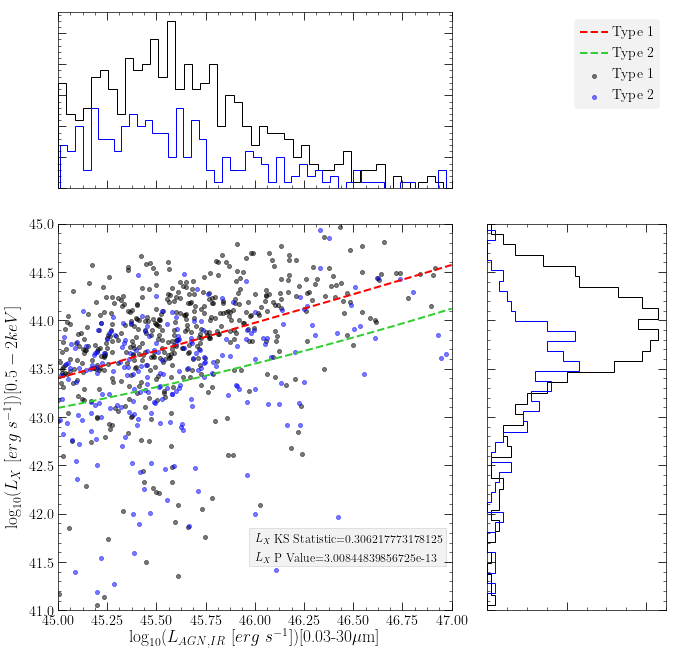

In [25]:
fig = plt.figure(figsize=(34,11))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatchedXRAYi['LAGNerg'],np.log10(T1LMatchedXRAYi['LX']), color = 'black', label = 'Type 1', alpha = 0.5)
ax.scatter(T2LMatchedXRAYi['LAGNerg'],np.log10(T2LMatchedXRAYi['LX']), color = 'blue', label = 'Type 2', alpha = 0.5)
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
#plt.plot(x,y, color = 'magenta', label = 'X=Y')
#plt.vlines(45, 40, 50, colors = 'black', linestyles='dashed')
#plt.plot(m, func(m, *popt), c = 'orange', alpha = 1, ls = '-',linewidth=2, label = 'All')
plt.plot(m, func(m, *popt1), c = 'red', alpha = 1, ls = '--',linewidth=2, label = 'Type 1')
plt.plot(m, func(m, *popt2), c = 'limegreen', alpha = 1, ls = '--',linewidth=2, label = 'Type 2')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}(L_{X}\ [erg\ s^{-1}])[0.5-2 keV] $')
ax.set_xlabel(r'$ \log_{10}(L_{AGN, IR}\ [erg\ s^{-1}])$[0.03-30$\mu$m] ')
ax.set_xlim(45, 47)
ax.set_ylim(41,45)
ax.text(46.1,41.7, 'KS Statistic=0.306217773178125', fontweight = 1000, fontsize = 12)
ax.text(46.1,41.5, 'P Value=3.00844839856725e-13', fontweight = 1000, fontsize = 12)
ax.text(46,41.69, r'$L_{X}$', fontweight = 1000, fontsize = 12)
ax.text(46,41.49, r'$L_{X}$', fontweight = 1000, fontsize = 12)
ax.add_patch(pathpatch)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels,fontsize='14',frameon = True, framealpha=0.1, facecolor = 'gray')



ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T1LMatchedXRAYi['LAGNerg'],bins=50, histtype ='step', color = 'black', density=False, lw=1, label="x", log=False )
ax.hist(T2LMatchedXRAYi['LAGNerg'],bins=50, histtype ='step', color = 'blue', density=False, lw=1, label="x", log=False )
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(45, 47)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(np.log10(T1LMatchedXRAYi['LX']),bins=50, orientation='horizontal', histtype ='step', color = 'black', density=False, lw=1, label="x", log=False )
ax.hist(np.log10(T2LMatchedXRAYi['LX']),bins=50, orientation='horizontal', histtype ='step', color = 'blue', density=False, lw=1, label="x", log=False )
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(41,45)
#ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)
plt.savefig('Figure9.png')

In [12]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(T1LMatchedXRAYi['LX'],T2LMatchedXRAYi['LX'] )
print (KS)

Ks_2sampResult(statistic=0.3062177731781256, pvalue=3.00844839856725e-13)


In [13]:
import pandas as pd
numbers = list(T1LMatchedXRAYi['LAGNerg'])
window_size = 20

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

#remove nans and name
moving_averages_list = moving_averages.tolist()
T1LAGNrunmean = moving_averages_list[window_size - 1:]

#print(T1LAGNrunmean)

In [14]:
import pandas as pd
numbers = list(T1LMatchedXRAYi['LX'])
window_size = 20

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

#remove nans and name
moving_averages_list = moving_averages.tolist()
T1LXrunmean1 = moving_averages_list[window_size - 1:]
T1LXrunmean = np.log10(T1LXrunmean1)

#print(T1LXrunmean)

In [15]:
plt.scatter(T1LAGNrunmean)
plt.xlim(45, 47)
plt.ylim(41,45)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
len(T1LXrunmean)